In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Modules, Splitting Directory & Using ImageDataGenerator**

In [ ]:
import tensorflow as tf
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array

**Splitting Directory in Training, Validation and Test Folders**

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/extra_project/corn_or_maize/data', output='/content/drive/MyDrive/extra_project', seed=1337, ratio=(0.8, 0, 0.2))

Copying files: 4164 files [24:57,  2.78 files/s]


**Using ImageDataGenerator to label the data inside the folders**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/extra_project/train', 
                                                 target_size=(64, 64), batch_size=32, 
                                                 class_mode='categorical')

Found 3329 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/extra_project/test', 
                                                 target_size=(64, 64), batch_size=32, 
                                                 class_mode='categorical')

Found 835 images belonging to 4 classes.


# **Simple CNN Implementation**

In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,3, activation='relu', padding='same', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(32,3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(32,3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
105/105 [==============================] - 41s 389ms/step - loss: 0.7358 - accuracy: 0.6978 - val_loss: 0.5449 - val_accuracy: 0.7784
Epoch 2/10
105/105 [==============================] - 41s 388ms/step - loss: 0.4590 - accuracy: 0.8099 - val_loss: 0.4579 - val_accuracy: 0.8072
Epoch 3/10
105/105 [==============================] - 43s 409ms/step - loss: 0.4065 - accuracy: 0.8255 - val_loss: 0.4490 - val_accuracy: 0.8072
Epoch 4/10
105/105 [==============================] - 40s 383ms/step - loss: 0.3766 - accuracy: 0.8426 - val_loss: 0.3974 - val_accuracy: 0.8299
Epoch 5/10
105/105 [==============================] - 40s 383ms/step - loss: 0.3447 - accuracy: 0.8579 - val_loss: 0.4240 - val_accuracy: 0.8263
Epoch 6/10
105/105 [==============================] - 41s 387ms/step - loss: 0.3197 - accuracy: 0.8669 - val_loss: 0.3560 - val_accuracy: 0.8467
Epoch 7/10
105/105 [==============================] - 47s 449ms/step - loss: 0.2895 - accuracy: 0.8810 - val_loss: 0.3949 - val_ac

In [ ]:
print(training_set.class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


# **Prediction**

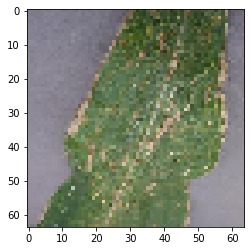

(64, 64, 3)
1/1 [==============================] - 0s 24ms/step
(1, 4)
[3.5644251e-01 1.3941082e-03 6.4215022e-01 1.3170166e-05]
2


In [ ]:
test_image = load_img('/content/drive/MyDrive/extra_project/corn_or_maize/data/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG', 
                            target_size=[64, 64])
plt.imshow(test_image)
plt.show()
test_image = img_to_array(test_image)
test_image = test_image/255
print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result.shape)
print(result[0])
print(np.argmax(result))

In [ ]:
Categories=['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Prediction = Categories[np.argmax(result)]
print(Prediction)

Gray_Leaf_Spot
